# Occurrence frequencies of IVT object for ERA5 over regional ICON domain (1984-2013)


In [5]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import os
from src.Enumerations import Month, Season, Experiments

from src.Corrections import * 
from src.Enumerations import Month, Season,Domains
from src.xarray_util import create_obj_from_dict,  ObjectContainer,  load_tracking_objects
from src.plot_funcs import plot_unstructured_rotated_grid,plot_tracks_rotated_grid


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Settings

In [2]:
input_path_ERA5 = '/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/'
input_path_CNRM = '/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control_remapped_3x/'
type_='IVT'
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
input_file_name_temp_CNRM = 'MOAPP_ICON_100and85controlperc_remapped_3x'
#input_field_grid= '/work/aa0238/a271093/data/input/IVT_85_percentiles_CNMR_control_3dx3dy.nc'
#GridPoint.input_field_grid = input_field_grid

first_year = 1998
last_year = 2022
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [6]:
exp_ERA5=Experiments.ERA5.value
input_path_ERA5= exp_ERA5.path_IVT_tracking
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'

IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5,
                                      input_file_name_temp_ERA5,
                                      type_,
                                      first_year,
                                      last_year,
                                      load_coordinates=True,
                                      exp=exp_ERA5,
                                      
                                      )

1984-01-01 00:00:00


KeyboardInterrupt: 

In [ ]:
IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5, input_file_name_temp_ERA5, type_, first_year, last_year,load_coordinates=True)
IVT_objs_CNRM = load_tracking_objects(input_path_CNRM, input_file_name_temp_CNRM, type_, first_year, last_year,load_coordinates=True)

 
    
  

1984-01-01 00:00:00
1984-07-01 00:00:00
1985-01-01 00:00:00
1985-07-01 00:00:00
1986-01-01 00:00:00
1986-07-01 00:00:00
1987-01-01 00:00:00
1987-07-01 00:00:00
1988-01-01 00:00:00
1988-07-01 00:00:00
1989-01-01 00:00:00
1989-07-01 00:00:00
1990-01-01 00:00:00
1990-07-01 00:00:00
1991-01-01 00:00:00
1991-07-01 00:00:00
1992-01-01 00:00:00
1992-07-01 00:00:00
1993-01-01 00:00:00
1993-07-01 00:00:00
1994-01-01 00:00:00
1994-07-01 00:00:00
1995-01-01 00:00:00
1995-07-01 00:00:00
1996-01-01 00:00:00
1996-07-01 00:00:00
1997-01-01 00:00:00
1997-07-01 00:00:00
1998-01-01 00:00:00
1998-07-01 00:00:00
1999-01-01 00:00:00
1999-07-01 00:00:00
2000-01-01 00:00:00
2000-07-01 00:00:00
2001-01-01 00:00:00
2001-07-01 00:00:00
2002-01-01 00:00:00
2002-07-01 00:00:00
2003-01-01 00:00:00
2003-07-01 00:00:00
2004-01-01 00:00:00
2004-07-01 00:00:00
2005-01-01 00:00:00
2005-07-01 00:00:00
2006-01-01 00:00:00
2006-07-01 00:00:00
2007-01-01 00:00:00
2007-07-01 00:00:00
2008-01-01 00:00:00
2008-07-01 00:00:00


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Season.DJF
Season.MAM
Season.JJA
Season.SON


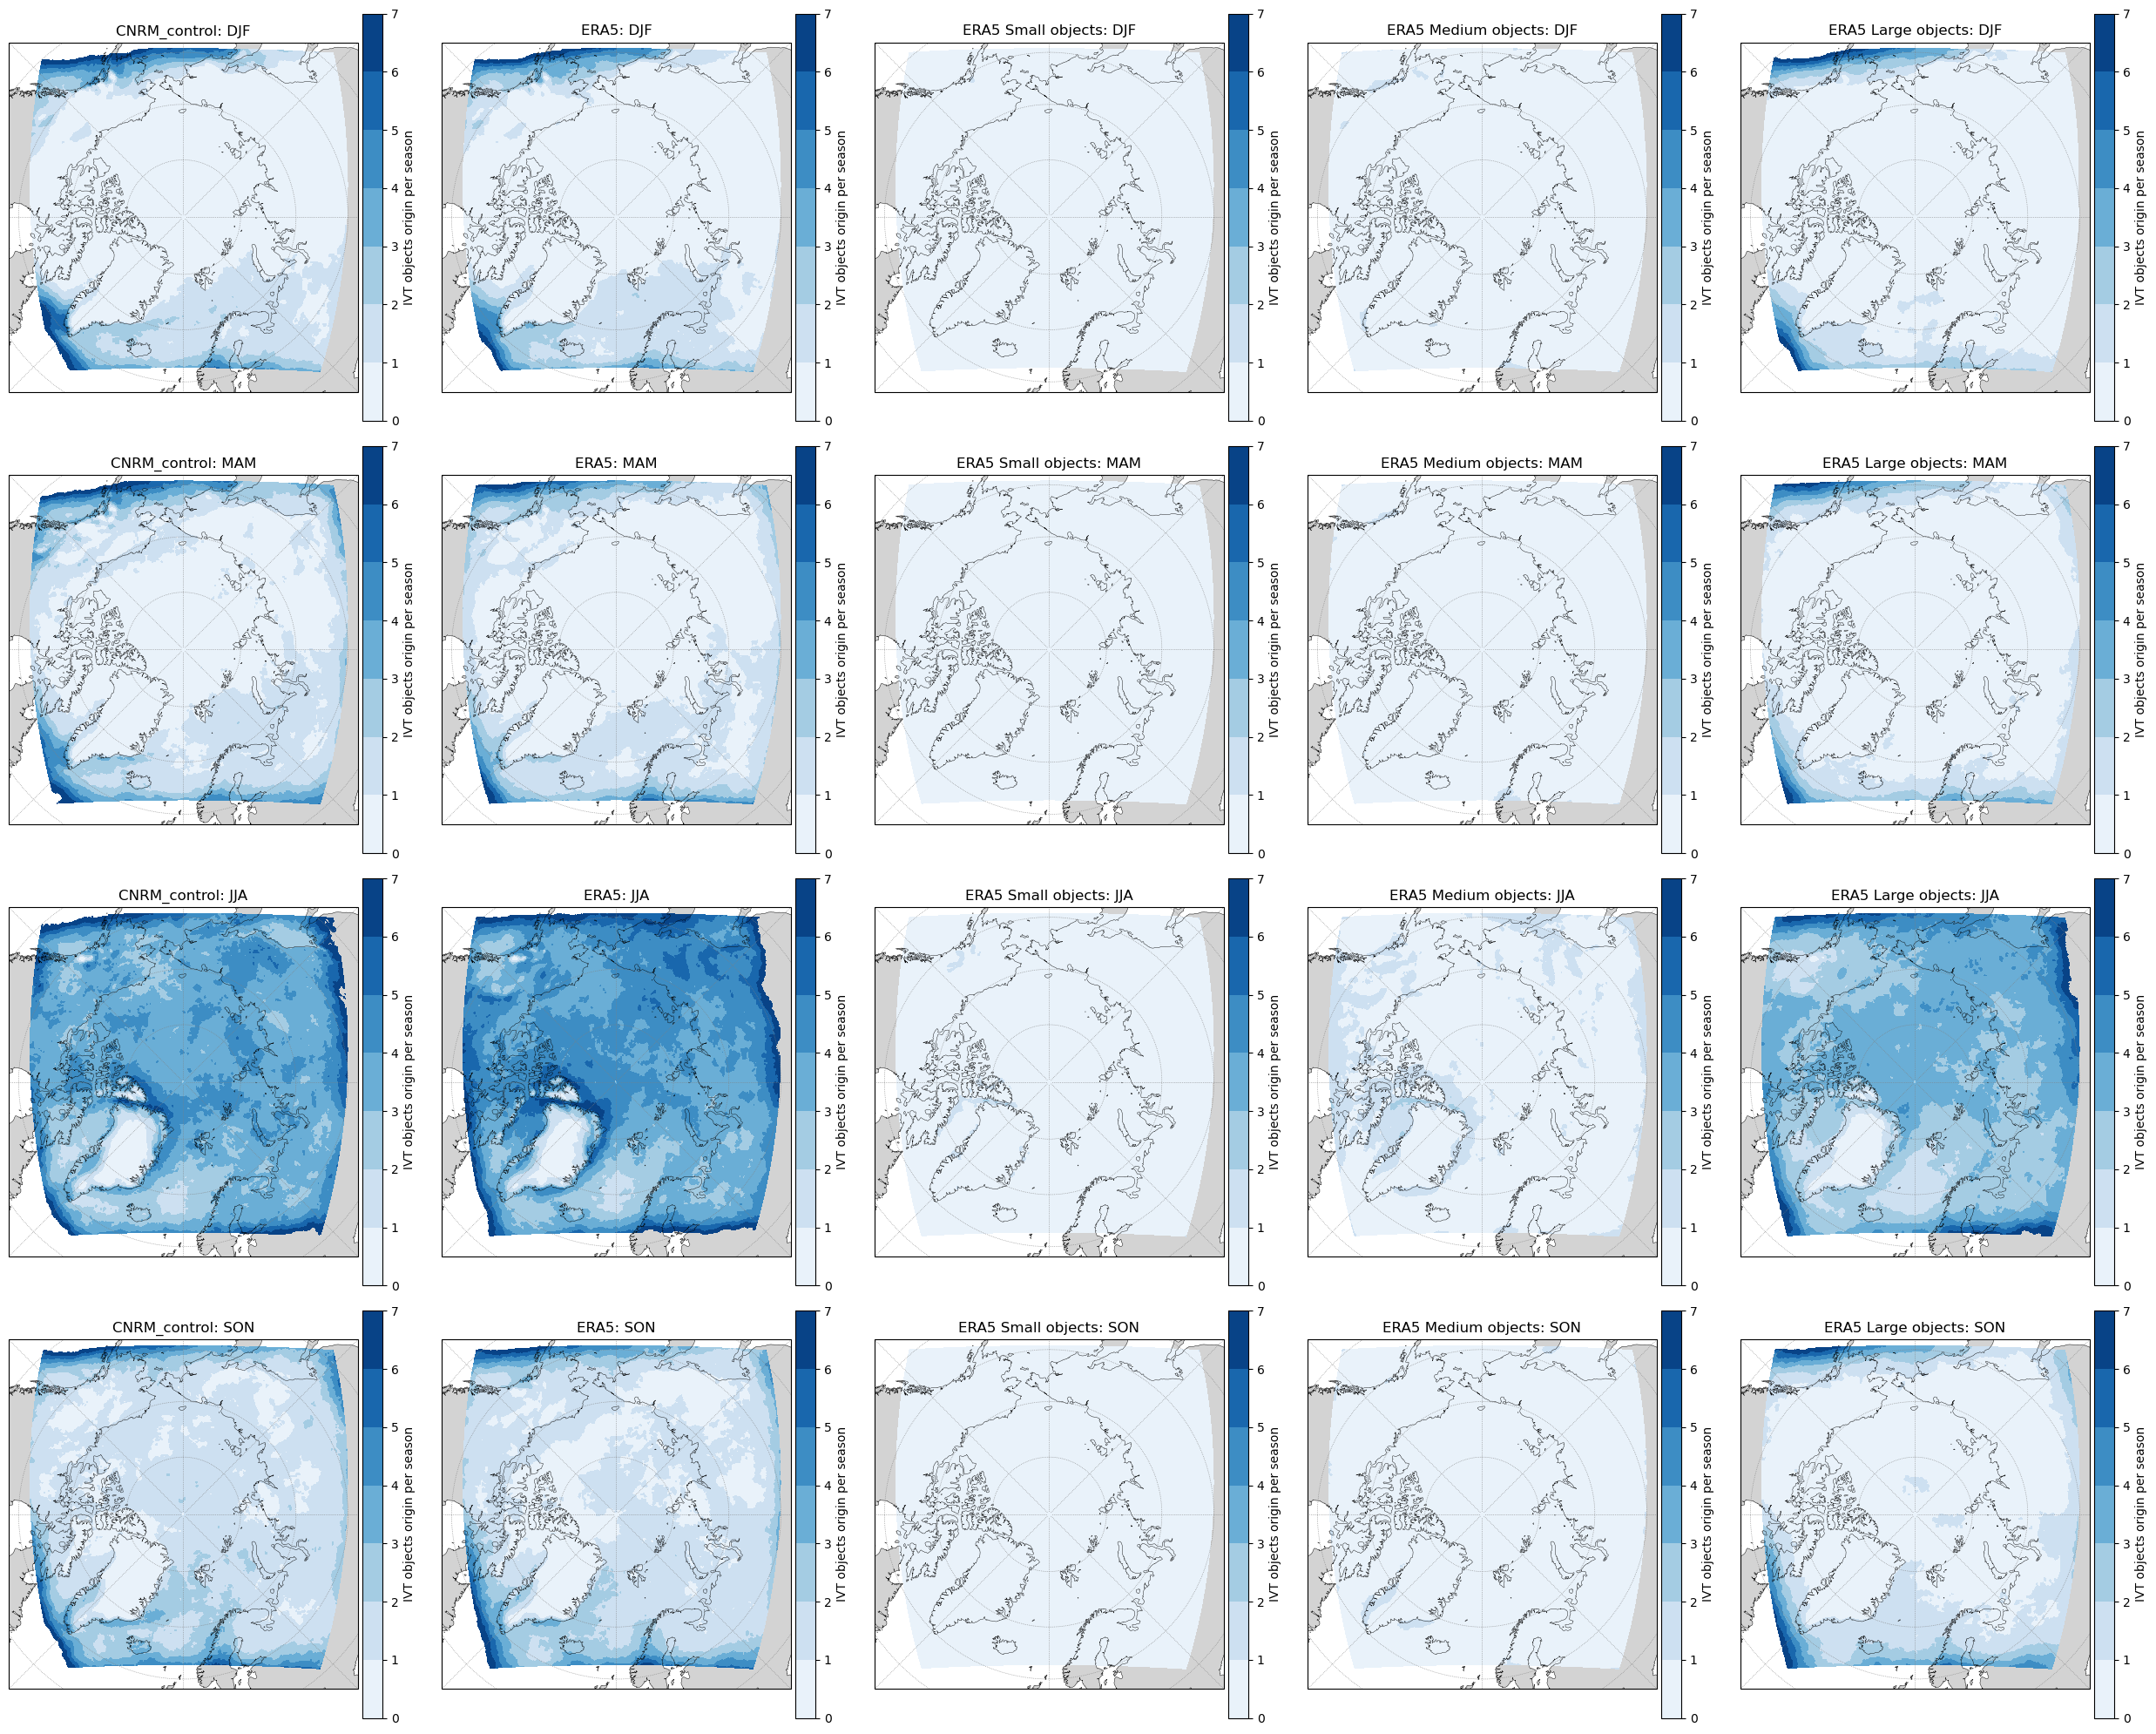

In [5]:
fig = plt.figure(figsize=(25,20))
subplts = (4,5)
levels=np.arange(0,8,1)
for  season_,i in zip(Season,[0,5,10,15]):
    
    print (season_)
    
        
    IVTobjs_sel_CNRM = IVT_objs_CNRM.sel_season(season_).seltimesteps(slice(0,1))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_CNRM, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i,
                                  subplts=subplts,
 
                                  levels = levels,
                                  title="CNRM_control: "+season_.name,
                                  cbar_label = "IVT objects origin per season",)
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).seltimesteps(slice(0,1))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+1 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5: '+ season_.name,
                                  cbar_label = "IVT objects origin per season",)
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).filter_by_attr_category('total_IVT', category='Small').seltimesteps(slice(0,1))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+2 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5 Small objects: '+ season_.name,
                                  cbar_label = "IVT objects origin per season",)
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).filter_by_attr_category('total_IVT', category='Medium').seltimesteps(slice(0,1))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+3 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5 Medium objects: '+ season_.name,
                                  cbar_label = "IVT objects origin per season",)
    
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).filter_by_attr_category('total_IVT', category='Large').seltimesteps(slice(0,1))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+4 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5 Large objects: '+ season_.name,
                                  cbar_label = "IVT objects origin per season",)
    
plt.tight_layout()


# Endpoints of IVT object

Season.DJF
Season.MAM
Season.JJA
Season.SON


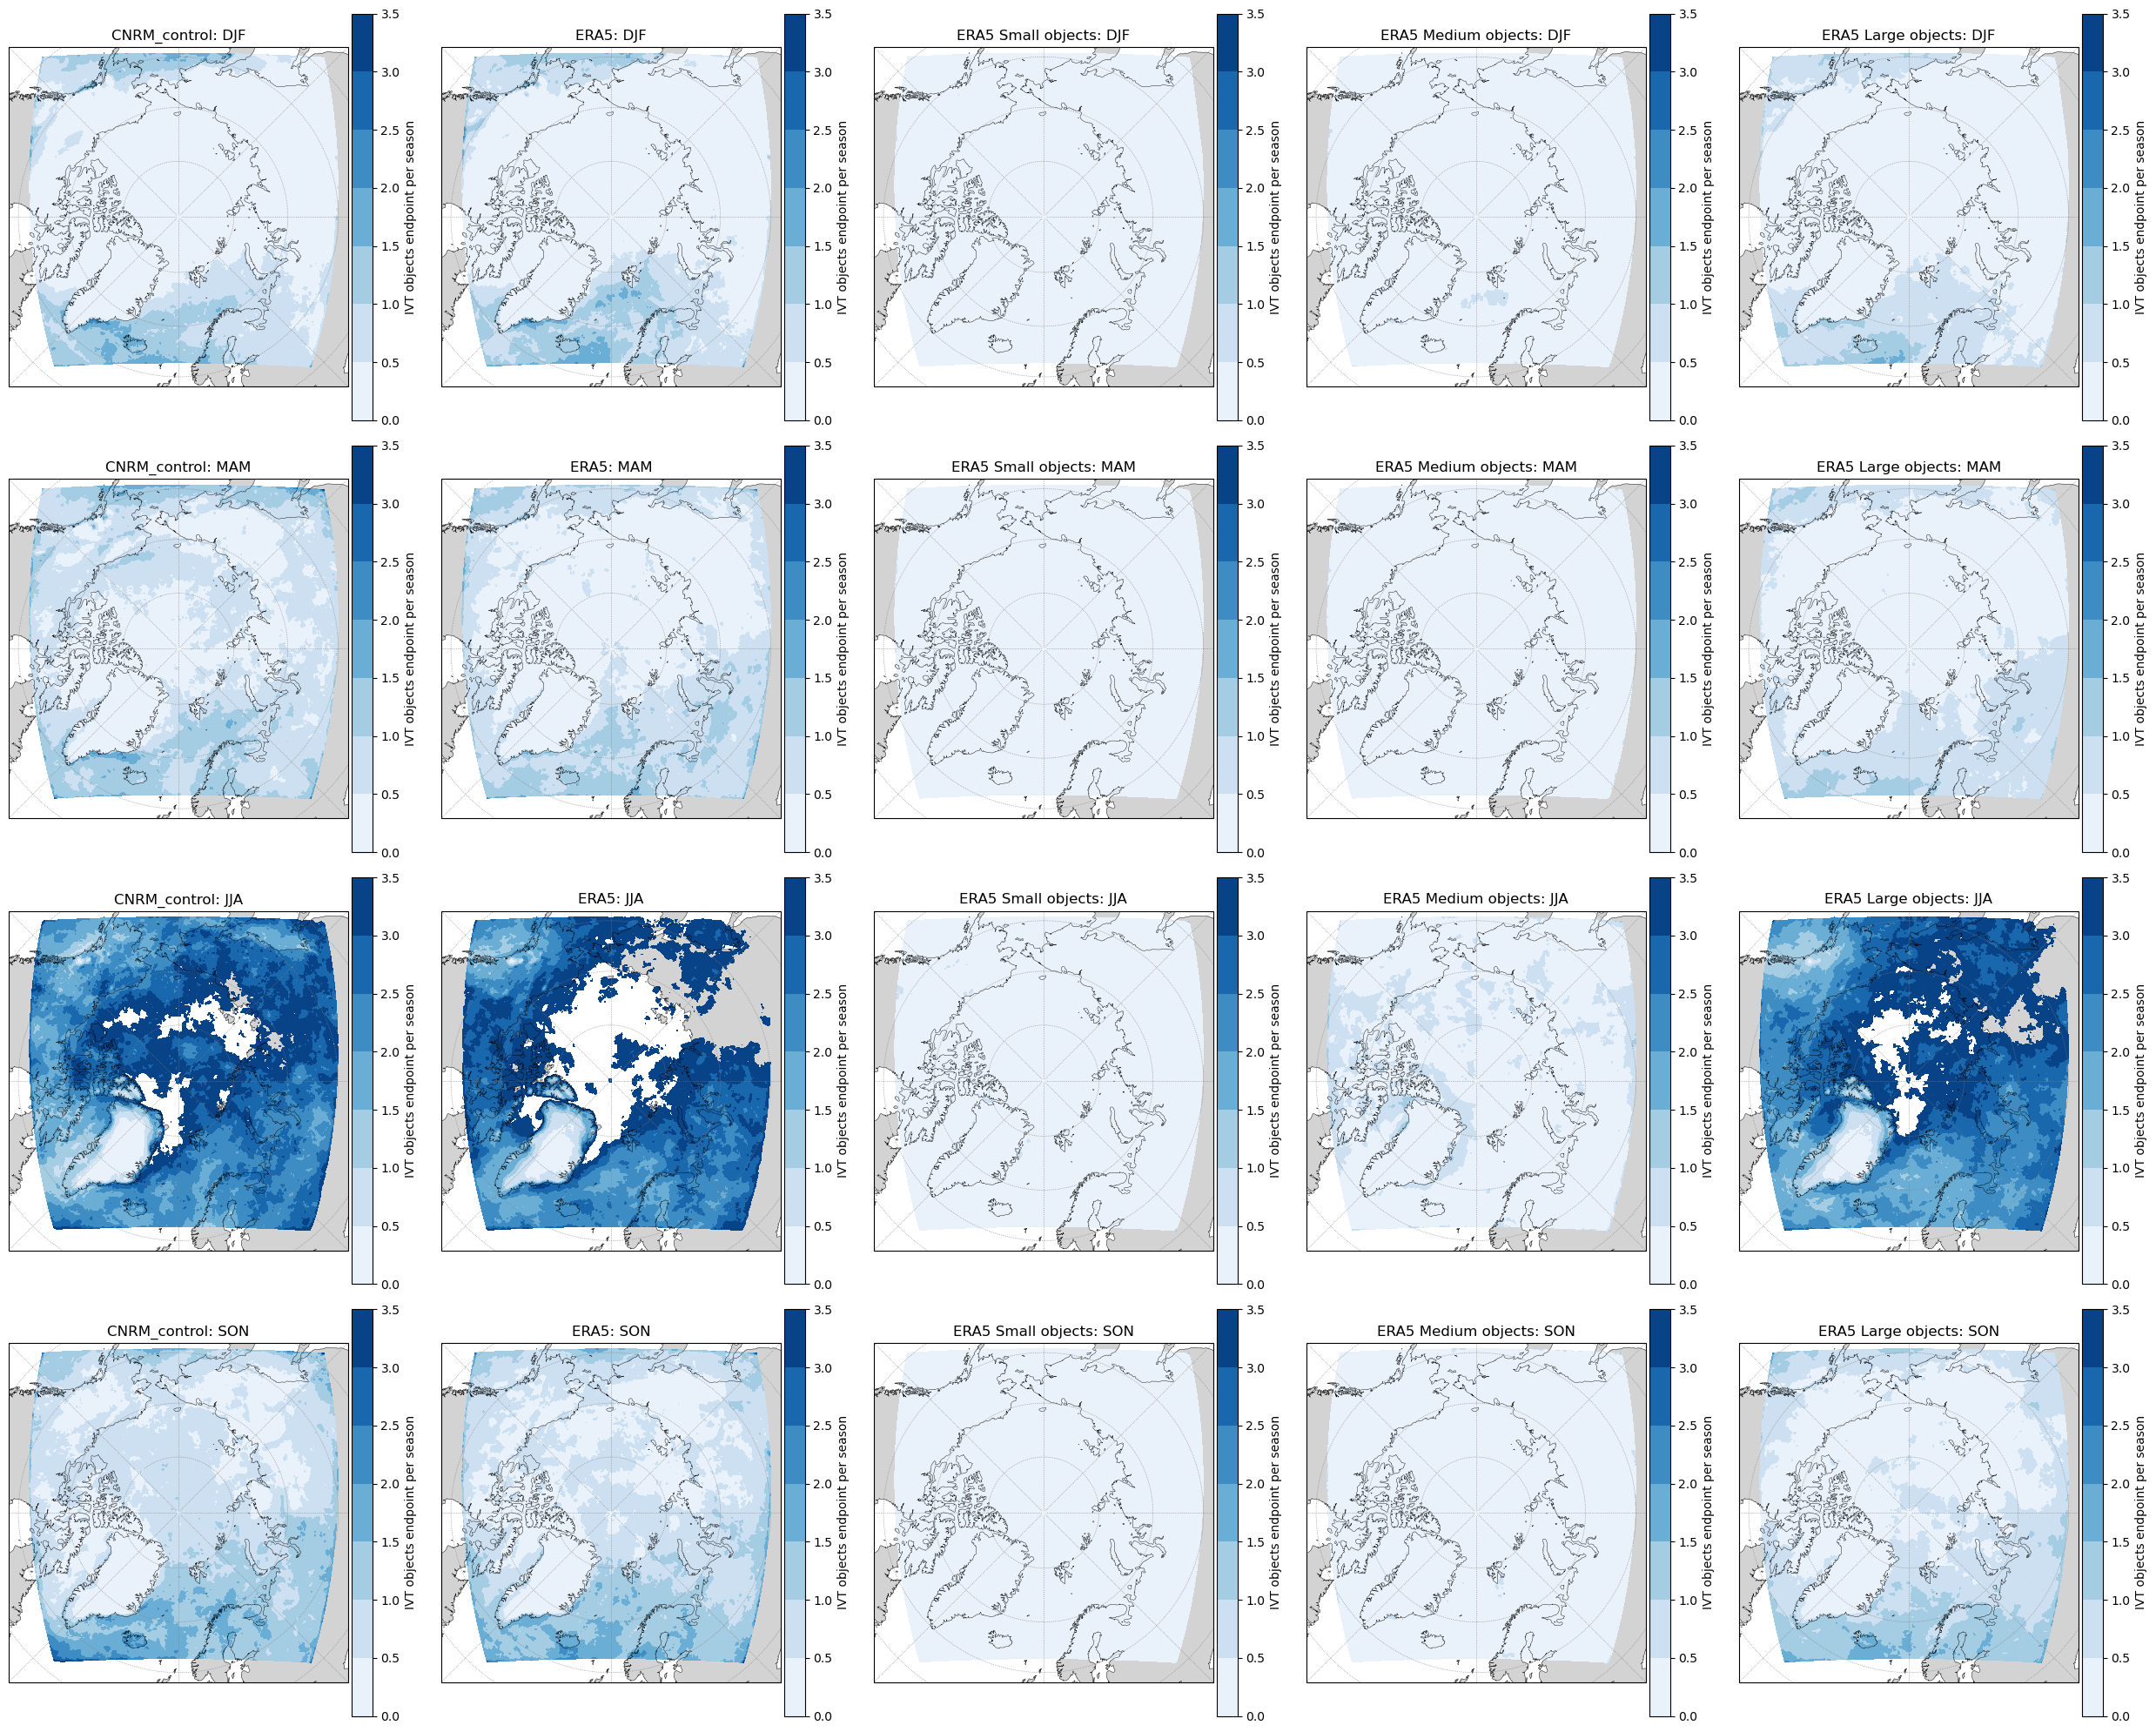

In [6]:
fig = plt.figure(figsize=(25,20))
subplts = (4,5)
levels=np.arange(0,4,0.5)
for  season_,i in zip(Season,[0,5,10,15]):
    
    print (season_)
    
        
    IVTobjs_sel_CNRM = IVT_objs_CNRM.sel_season(season_).seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_CNRM, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i,
                                  subplts=subplts,
 
                                  levels = levels,
                                  title="CNRM_control: "+season_.name,
                                  cbar_label = "IVT objects endpoint per season",)
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+1 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",)
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).filter_by_attr_category('total_IVT', category='Small').seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+2 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5 Small objects: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",)
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).filter_by_attr_category('total_IVT', category='Medium').seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+3 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5 Medium objects: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",)
    
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).filter_by_attr_category('total_IVT', category='Large').seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+4 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5 Large objects: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",)
    
plt.tight_layout()

# Endpoints for objects starting in NorthAtlantic

Season.DJF
Season.MAM
Season.JJA
Season.SON


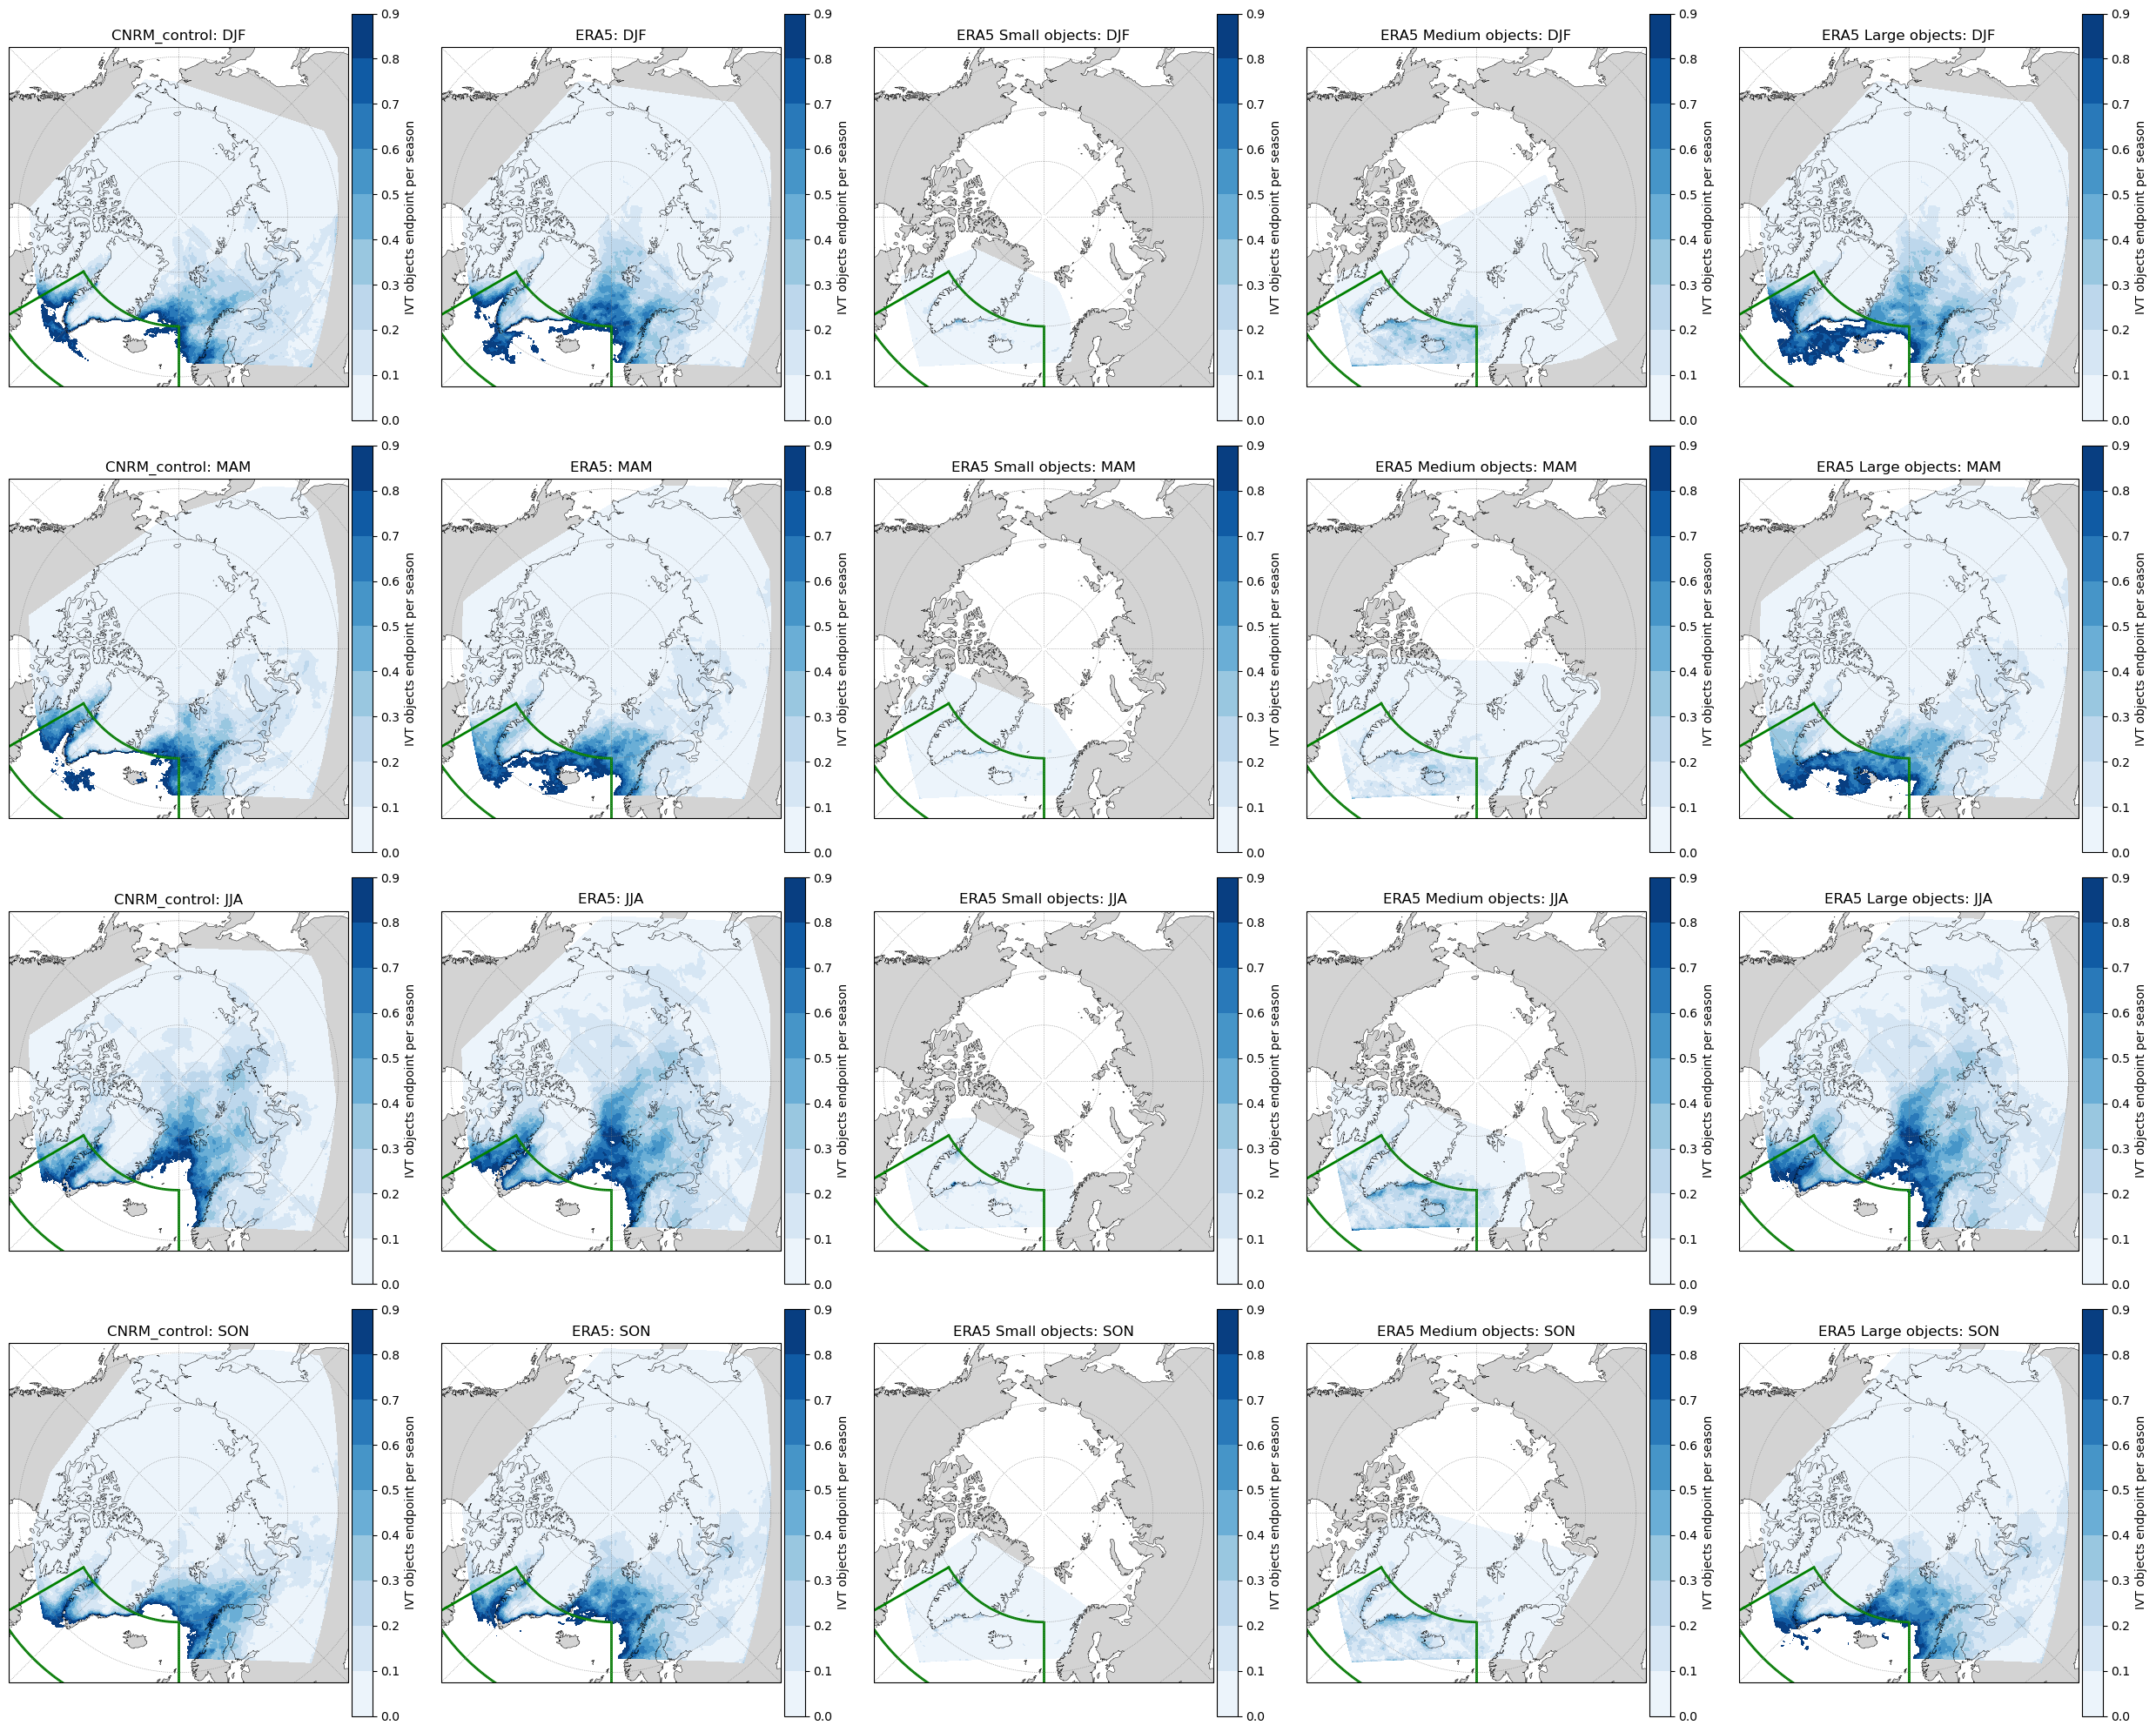

In [7]:
fig = plt.figure(figsize=(25,20))
subplts = (4,5)
levels=np.arange(0,1,0.1)
for  season_,i in zip(Season,[0,5,10,15]):
    
    print (season_)
    
        
    IVTobjs_sel_CNRM = IVT_objs_CNRM.sel_season(season_).sel_by_domain(Domains.NORTH_ATLANTIC).seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_CNRM, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i,
                                  subplts=subplts,
 
                                  levels = levels,
                                  title="CNRM_control: "+season_.name,
                                  cbar_label = "IVT objects endpoint per season",
                                  plot_domains={Domains.NORTH_ATLANTIC : 'green'})
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(Domains.NORTH_ATLANTIC).seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+1 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",
                                  plot_domains={Domains.NORTH_ATLANTIC : 'green'})
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).filter_by_attr_category('total_IVT', category='Small').sel_by_domain(Domains.NORTH_ATLANTIC).seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+2 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5 Small objects: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",
                                  plot_domains={Domains.NORTH_ATLANTIC : 'green'})
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).filter_by_attr_category('total_IVT', category='Medium').sel_by_domain(Domains.NORTH_ATLANTIC).seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+3 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5 Medium objects: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",
                                  plot_domains={Domains.NORTH_ATLANTIC : 'green'})
    
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).filter_by_attr_category('total_IVT', category='Large').sel_by_domain(Domains.NORTH_ATLANTIC).seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+4 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5 Large objects: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",
                                  plot_domains={Domains.NORTH_ATLANTIC : 'green'})
    
plt.tight_layout()

# Endpoints for objects starting in NorthPacific

In [ ]:
fig = plt.figure(figsize=(25,20))
subplts = (4,5)
levels=np.arange(0,1,0.1)
for  season_,i in zip(Season,[0,5,10,15]):
    
    print (season_)
    
        
    IVTobjs_sel_CNRM = IVT_objs_CNRM.sel_season(season_).sel_by_domain(Domains.NORTH_PACIFIC).seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_CNRM, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i,
                                  subplts=subplts,
 
                                  levels = levels,
                                  title="CNRM_control: "+season_.name,
                                  cbar_label = "IVT objects endpoint per season",
                                  plot_domains={Domains.NORTH_PACIFIC : 'green'})
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(Domains.NORTH_PACIFIC).seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+1 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",
                                  plot_domains={Domains.NORTH_PACIFIC : 'green'})
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).filter_by_attr_category('total_IVT', category='Small').sel_by_domain(Domains.NORTH_PACIFIC).seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+2 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5 Small objects: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",
                                  plot_domains={Domains.NORTH_PACIFIC : 'green'})
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).filter_by_attr_category('total_IVT', category='Medium').sel_by_domain(Domains.NORTH_PACIFIC).seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+3 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5 Medium objects: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",
                                  plot_domains={Domains.NORTH_PACIFIC : 'green'})
    
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).filter_by_attr_category('total_IVT', category='Large').sel_by_domain(Domains.NORTH_PACIFIC).seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+4 ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5 Large objects: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",
                                  plot_domains={Domains.NORTH_PACIFIC : 'green'})
    
plt.tight_layout()

Season.DJF
Season.MAM
Season.JJA
Season.SON


Season.DJF
Season.MAM
Season.JJA
Season.SON


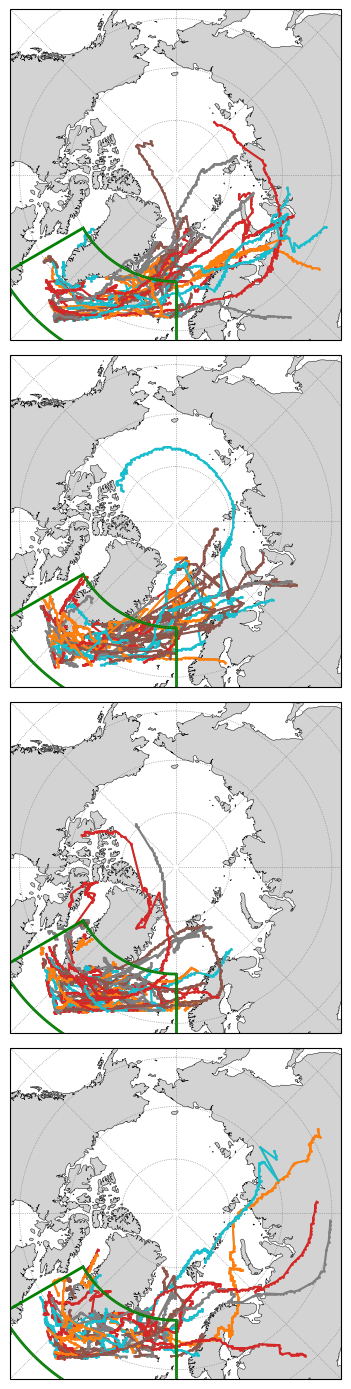

In [12]:
fig = plt.figure(figsize=(80,14))

for i, season_ in enumerate(Season):
    print (season_)
   

    tracks = IVT_objs.sel_season(season_).sel_by_domain(Domains.NORTH_ATLANTIC).get_attributes(attr='rotated_track')
    
    
    plot_tracks_rotated_grid(tracks,
                                  fig=fig,
                                  index = i,
                                  levels = [1,2,3,4,5],
                                  title=season_.name,
                                  cbar_label = "IVT objects origin per season",
                                    plot_domains={Domains.NORTH_ATLANTIC : 'green'})
    
plt.tight_layout()




In [71]:
for lon, lat, size in zip(lons, lats, sizes):
            ax.plot(lon, lat, marker='o', markerfacecolor=color, transform=crs_rot, alpha=1, markeredgecolor='None', markersize=size)

TypeError: chain.from_iterable() takes exactly one argument (2 given)

Season.WINTER


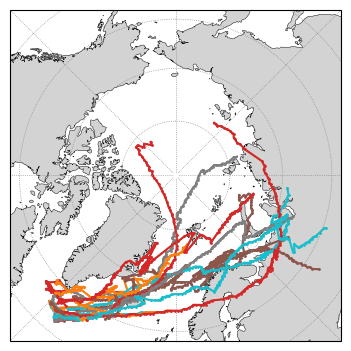

In [47]:
fig = plt.figure(figsize=(80,14))

for i, season_ in enumerate(Season):
    print (season_)
   

    tracks = IVT_objs.sel_season(season_).sel_by_domain(Domains.NORTH_ATLANTIC).get_attributes(attr='rotated_track')
    
    
    plot_tracks_rotated_grid(tracks,
                                  fig=fig,
                                  index = i,
                                  levels = [1,2,3,4,5],
                                  title=season_.name,
                                  cbar_label = "IVT objects origin per season")
    break
    
plt.tight_layout()


